In [7]:
import numpy as np
from numpy import linalg as lg
from matplotlib import pyplot as plt

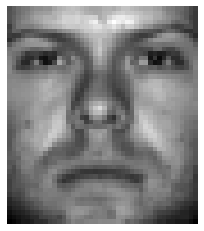

In [8]:
yalefaces = np.loadtxt("yalefaces.csv", delimiter=',')
plt.imshow(yalefaces[:, 0].reshape((48, 42)), cmap='gray')
plt.axis('off')
plt.show()

In [9]:
cov = np.cov(yalefaces, bias=True) # sample covariance matrix
eigvals, eigvecs = lg.eig(cov)
eigvals, eigvecs = np.real(eigvals), np.real(eigvecs)

inds = np.argsort(eigvals)[::-1] # sort eigenvalues
eigvals, eigvecs = eigvals[inds], eigvecs[:, inds]

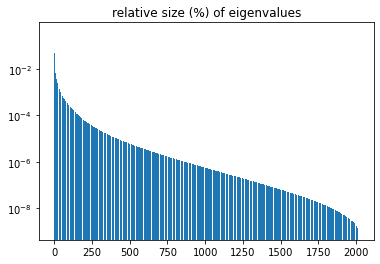

In [10]:
rel_eigvals = eigvals / eigvals.sum()
plt.bar(np.arange(eigvals.size), rel_eigvals)
plt.yscale('log')
plt.title("relative size (%) of eigenvalues")
plt.show()

95% of data retained after 42 principal components
99% of data retained after 166 principal components


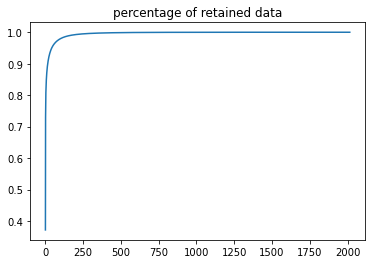

In [11]:
sum_rel_eigvals = rel_eigvals.cumsum()
print(f"95% of data retained after {np.argmax(sum_rel_eigvals > 0.95)} principal components")
print(f"99% of data retained after {np.argmax(sum_rel_eigvals > 0.99)} principal components")
plt.plot(np.arange(eigvals.size), sum_rel_eigvals)
plt.title("percentage of retained data")
plt.show()

<ipython-input-12-5d62b3dcd6cc>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


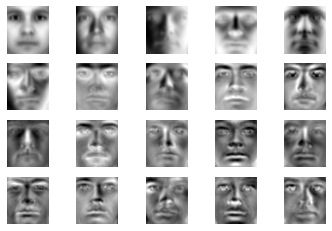

In [12]:
fig, ax = plt.subplots(4, 5)
inds = np.array(np.meshgrid(np.arange(4), np.arange(5))).T.reshape(-1, 2)
i, j = 0, 0
eigvecs = np.hstack([yalefaces.mean(axis=1)[:, None], eigvecs])
for ind in range(inds.shape[0]):
    i, j = inds[ind][0], inds[ind][1]
    ax[i, j].imshow(eigvecs[:, ind].reshape((48, 42)), cmap='gray')
    ax[i, j].axis('off')
fig.show()

The first image is the average of all faces. Images 3, 4, 6, 12 show principal components of different lighting angles - right, bottom, left, top respectively. Image 8 shows the faces at a slight upwards angle, where the mouth/nose is more pronounced. 